#Question 1a

In [11]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
gs = np.random.normal(7.25, 0.875, 10000) # generating normal distribution with mean 7.25, standard deviation 0.875, and 10000 samples using normal distribution sampler

#Question 1b

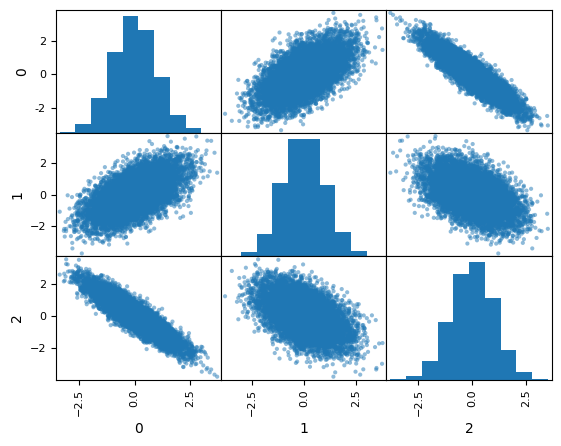

(array([  10.,   55.,  146.,  322.,  712., 1148., 1604., 1724., 1614.,
        1207.,  792.,  415.,  148.,   82.,   16.,    5.]),
 array([-3.37500643, -2.93173081, -2.48845518, -2.04517956, -1.60190394,
        -1.15862831, -0.71535269, -0.27207706,  0.17119856,  0.61447419,
         1.05774981,  1.50102543,  1.94430106,  2.38757668,  2.83085231,
         3.27412793,  3.71740356]),
 <BarContainer object of 16 artists>)

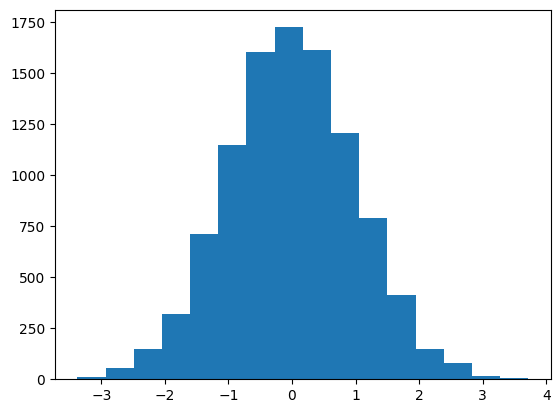

In [61]:
sigma = np.array([
    [1, 0.6, -0.9],
    [0.6, 1.0, -0.5],
    [-0.9, -0.5, 1.0]
]) # specifying correlation between each variable through its covariance matrix
mu = np.array([0, 0, 0]) # specifying means for each variable
APT = np.random.multivariate_normal(mu, sigma, 10000) # generating distributions for ak, pp, and ptime using multivariate normal distribution sampler with specified correlation matrix and means
df = pd.DataFrame(APT) # instatiates dataframe with the generated distributions
pd.plotting.scatter_matrix(df) # generates scatterplot matrix for dataframe
plt.show() # shows plot
plt.hist(APT[:, 0], bins=16)

#Question 1c

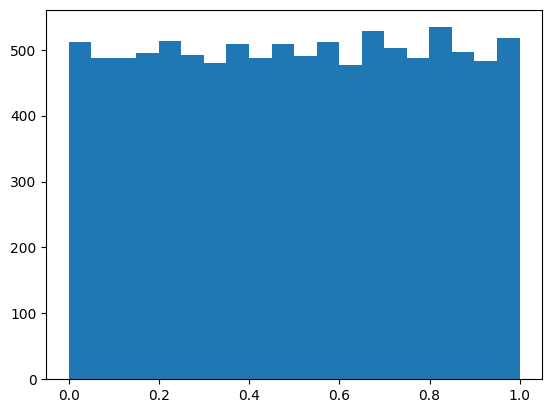

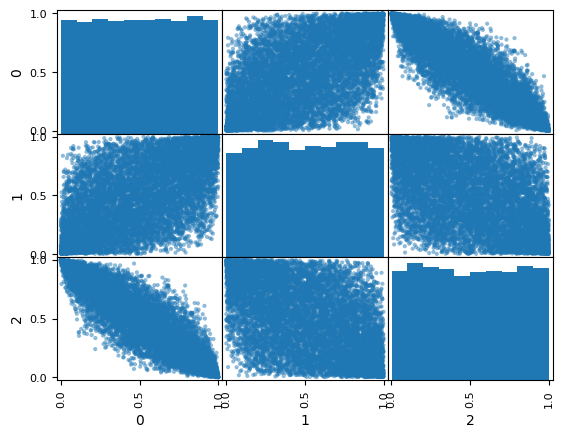

In [59]:
U = stats.norm.cdf(APT, 0, 1) # applies CDF for normal distribution to data
plt.hist(U[:, 0], bins=20) # plots histogram with 20 bins for CDF of first distribution
df = pd.DataFrame(U) # instatiates dataframe with CDF
pd.plotting.scatter_matrix(df) # generates scatterplot matrix for dataframe
plt.show() # shows plot

#Question 1d

(array([  71.,  359.,  819., 1387., 1732., 1749., 1491., 1071.,  643.,
         349.,  195.,   85.,   32.,   14.,    3.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        ]),
 <BarContainer object of 15 artists>)

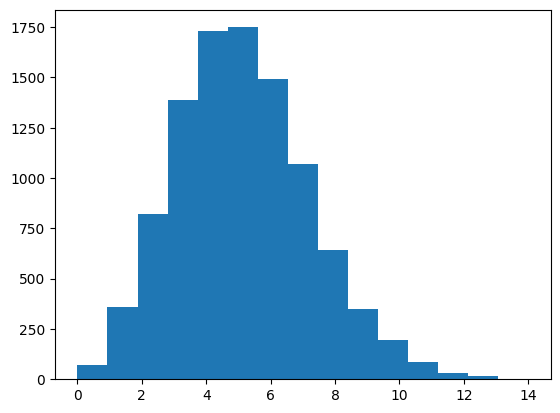

In [46]:
ak = stats.poisson.ppf(U[:, 0], 5) # creates distribution for first column of uniform distribution by applying quantile function for Poisson distribution with lambda 5
plt.hist(ak, bins=15) # plots histogram with 15 bins for generated distribution

(array([  18.,  170.,  454., 1105., 1899., 2030., 1777., 1326.,  707.,
         331.,  127.,   41.,   12.,    3.]),
 array([ 4.        ,  5.92857143,  7.85714286,  9.78571429, 11.71428571,
        13.64285714, 15.57142857, 17.5       , 19.42857143, 21.35714286,
        23.28571429, 25.21428571, 27.14285714, 29.07142857, 31.        ]),
 <BarContainer object of 14 artists>)

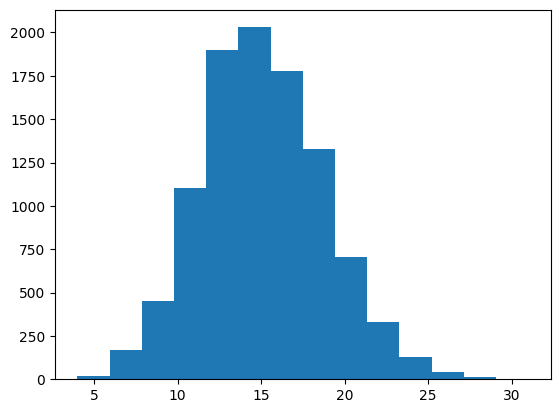

In [42]:
pp = stats.poisson.ppf(U[:, 1], 15) # creates distribution for second column of uniform distribution by applying quantile function for Poisson distribution with lambda 15
plt.hist(pp, bins=14) # plots histogram with 14 bins for generated distribution

(array([  12.,   99.,  484., 1486., 2524., 2625., 1826.,  721.,  193.,
          27.,    3.]),
 array([  8.65171561,  30.24479961,  51.83788362,  73.43096762,
         95.02405163, 116.61713563, 138.21021964, 159.80330364,
        181.39638765, 202.98947165, 224.58255566, 246.17563966]),
 <BarContainer object of 11 artists>)

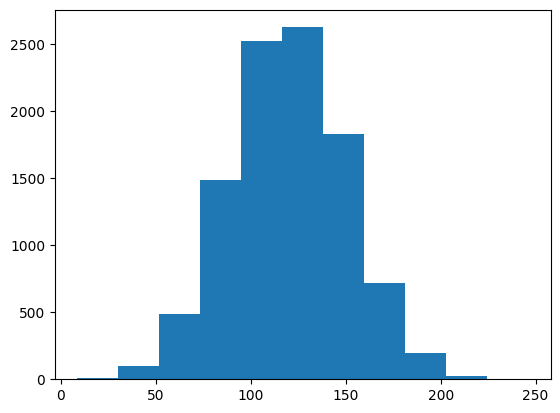

In [48]:
ptime = stats.norm.ppf(U[:, 2], 120, 30) # creates distribution for third column of uniform distribution by applying quantile function for Normal distribution with mean 120 and standard deviation 30
plt.hist(ptime, bins=11) # plots histogram with 11 bins for generated distribution

(array([   3.,   10.,   92.,  400., 1164., 2072., 2543., 2118., 1127.,
         377.,   80.,   14.]),
 array([ 3.55743279,  4.12842541,  4.69941802,  5.27041064,  5.84140326,
         6.41239587,  6.98338849,  7.5543811 ,  8.12537372,  8.69636633,
         9.26735895,  9.83835157, 10.40934418]),
 <BarContainer object of 12 artists>)

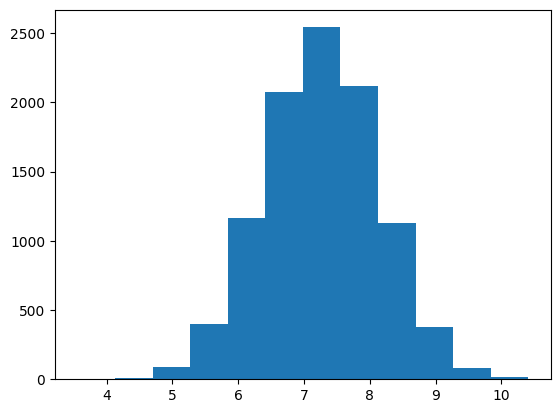

In [49]:
plt.hist(gs, bins=12) # plots histogram with 12 bins for distribution generated in Question 1a

#Question 1e

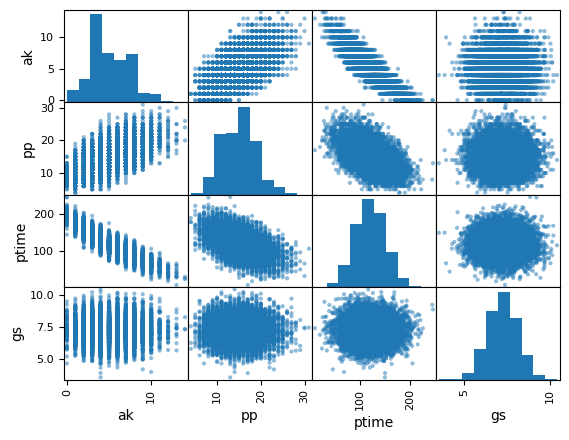

In [56]:
distributions = {'ak':ak,'pp':pp,'ptime':ptime,'gs':gs} # maps variable name to distribution for easy dataframe loading
df = pd.DataFrame(distributions) # loads distributions into dataframe
pd.plotting.scatter_matrix(df) # generates scatterplot matrix for dataframe
plt.show() # shows plot

#Question 2

I'm not really sure what this question is asking, but I'm going to try to interpret it for some credit (hopefully). So, the data arrive sequentially one at a time and we must introduce the index i to represent the ith arriving data sample xi. On top of this, we are expected to write the expression for sample correlation matrix. I believe the problem is expecting us to come up with some sort of formula that utilizes the summation symbol sigma starting at i = 1 up to i = 100 or so. My best guess for this formula would be the one for the sample correlation matrix. Then, the second part expects us to write the expression that can be estimated recursively and plot the elements from i = 1 to i = 100. I believe that this is expecting us to tweak the formula so that it relies on the previous element(s) to calculate the new correlation matrix for each i. Therefore, if we're showing the expression for i, the expression would contain the correlation matrix for i - 1. This is along the lines of how a Fibonacci sequence is calculated recursively with base cases like so: F0 = 0, F1 = 1, Fn = Fn-1 + Fn-2, F2 = F1 + F0 = 1 + 0 = 1, ...
